# Aufgabe 2: Classification

Das Ziel von Ensemble-Methoden besteht darin, die Vorhersagen mehrerer Basisschätzer zu kombinieren, die mit einem gegebenen Lernalgorithmus gebaut wurden, um die Verallgemeinerbarkeit / Robustheit über einen einzigen Schätzer zu verbessern.

Da Ensembles eine Kombination mehrerer kleinerer Klassifikatoren sind, sind sie ein gutes Beispiel für einen Job, der auf Multicore-Architekturen, wie SDIL, massiv beschleunigt werden kann, da jeder Klassifikator parallel trainiert wird.

a) Simulieren Sie einen ausreichenden Anzahl an dummy Daten (>100.000 Datenpunkten) mit der Methode `sklearn.datasets.make_classification`.

In [29]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from time import time  # measure the training time
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

NUM_OF_CPU_CORES = 8  # Physical cores as chosen in SDIL

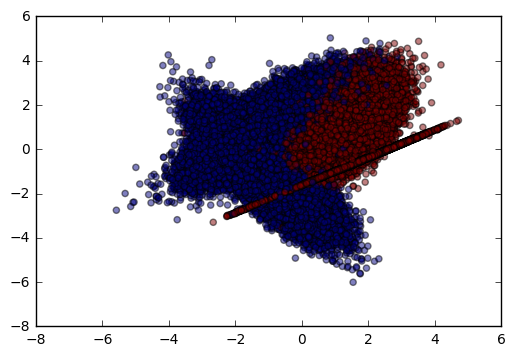

In [22]:
# generate 200.000 samples with 2 dimensions out of 2 classes having 2 clusters each
X, y = make_classification(n_samples=200000, n_features=2, n_redundant=0, n_clusters_per_class=2, random_state=1)

plt.scatter(X[:,0],X[:,1],c=y, alpha=0.5);
plt.show()

Es werden 200.000 Samples aus zwei Klassen mit jeweils 2 Clustern generiert. Damit man die Daten leichter darstellen kann, gibt es nur zwei Dimensionen.

b) Trainieren Sie einen Ensemble-Classifier (z.B. Random Forest) auf dummy Daten auf eine unterschiedliche Anzahl von CPU-Kerne (parameter `n_jobs` in sklearn).

In [23]:
times = []
clf = None
n_jobs_list = range(1, NUM_OF_CPU_CORES + 1)
for n_jobs in n_jobs_list:
    t0 = time()
    clf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0, n_jobs=n_jobs)
    clf.fit(X,y)
    times.append(time() - t0)
clf.score(X, y)

0.91892499999999999

In Abhängigkeit davon wie viele Prozessoren zur Verfügung stehen, wird der `RandomForestClassifier` mit einer steigenden Anzahl von Prozessoren trainiert. Um zu zeigen, dass ein valider Klassifikator trainiert wird, wird der Score am Ende ausgegeben. In Times sind die Zeiten in Sekunden eingefügt. Das $i$-te Element ist die Zeit, die $i$ Prozessoren zum trainieren benötigen (beginnend mit 1).

c) Plotten Sie anschließend eine Kurve mit der Trainingszeit, in Abhängigkeit der Anzahl an CPU-Kernen.

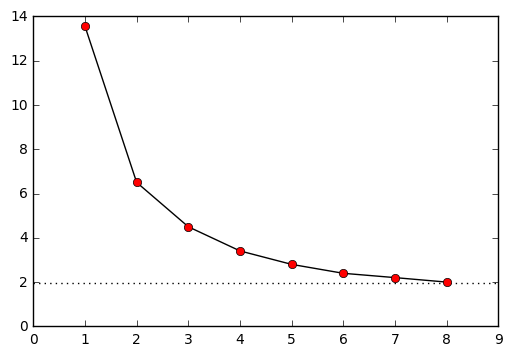

[13.556712627410889,
 6.506181240081787,
 4.502025127410889,
 3.4111709594726562,
 2.803116798400879,
 2.399691104888916,
 2.2054126262664795,
 2.0030176639556885]

In [26]:
plt.plot(n_jobs_list, times, 'k', n_jobs_list, times, 'ro')
plt.hlines(1.98, 0, NUM_OF_CPU_CORES + 1, linestyles='dotted')
plt.show()
times # print precise values

Die Laufzeit nimmt bei wenigen, zusätzlichen Kernen stark ab. Diese Laufzeitreduktion nimmt mit steigender Prozessorenanzahl ab.

In [33]:
np.array(times) * np.array(range(1, NUM_OF_CPU_CORES + 1))

array([ 13.55671263,  13.01236248,  13.50607538,  13.64468384,
        14.01558399,  14.39814663,  15.43788838,  16.02414131])

Die Effizienz der Parallelisierung nimmt bei steigender Prozessorenanzahl leicht ab. Würde der Algorithmus perfekt parallelisiert, wären die angezeigten Zahlen konstant.